# Маркетиноговая аналитика Яндекс.Афиши

Необходимо изучить данные Яндекс.Афиши с июня 2017 по конец мая 2018 года, и на их основе помочь маркетологам отказать от невыгодных источников трафика и перераспределить бюджет.

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_log.csv')
    orders = pd.read_csv('/datasets/orders_log.csv')
    costs = pd.read_csv('/datasets/costs.csv')
except:
    visits = pd.read_csv(--)
    orders = pd.read_csv(--)
    costs = pd.read_csv(--)

## Предобработка данных

In [3]:
visits.head(3)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.columns = visits.columns.str.lower()
visit = visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'}, inplace=True)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


заменим тип данных где это нужно на datetime

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [7]:
orders.head(3)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'buy ts': 'buy_ts'})
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [11]:
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим на наличие дубликатов

In [14]:
visits.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6], dtype=int64)

In [18]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

Отсутствуют данные о расходах для 7 и 6 источников, возможно это органические посещения или реферальные.

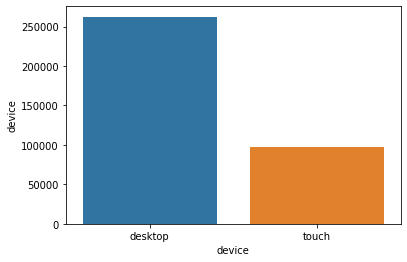

In [19]:
device = visits.groupby('device').agg({'device': 'count'})
sns.barplot(data=device, x=device.index, y='device')
plt.show()

Больше всего заходят с ПК.

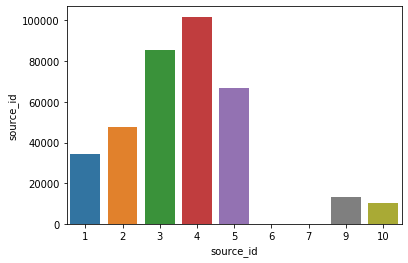

In [20]:
sns.barplot(data=visits.groupby('source_id').agg({'source_id': 'count'}),
            x=visits.groupby('source_id').agg({'source_id': 'count'}).index,
            y='source_id')
plt.show()

Самыми популярными источниками являются 3,4,5. При этом данных по 6,7 крайне мало.

In [21]:
visits[visits['source_id'] == 6].count()

device       6
end_ts       6
source_id    6
start_ts     6
uid          6
dtype: int64

In [22]:
visits[visits['source_id'] == 7].count()

device       36
end_ts       36
source_id    36
start_ts     36
uid          36
dtype: int64

Доля таких посещений очень мала.

In [23]:
visits[visits['end_ts'] > visits['start_ts']].count()

device       323604
end_ts       323604
source_id    323604
start_ts     323604
uid          323604
dtype: int64

In [24]:
visits[['start_ts','end_ts']].describe()

,start_ts,end_ts
count,359400,359400
unique,224303,224760
top,2017-11-24 16:06:00,2017-11-24 16:51:00
freq,19,23
first,2017-06-01 00:01:00,2017-06-01 00:02:00
last,2018-05-31 23:59:00,2018-06-01 01:26:00


In [25]:
orders[['buy_ts']].describe()

,buy_ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9
first,2017-06-01 00:10:00
last,2018-06-01 00:02:00


## Расчет метрик

### Продуктовые метрики

#### DAU, WAU, MAU

In [26]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_year'] = visits['start_ts'].dt.year

In [27]:
mau = visits.groupby('session_month').agg({'uid': 'nunique'})

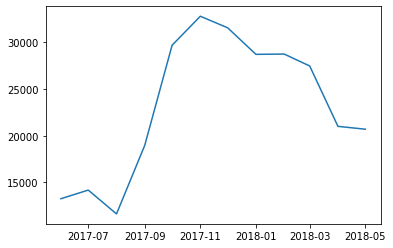

In [92]:
plt.plot(mau)
plt.show()

In [29]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

wau_2017 = visits.query('session_year == 2017').groupby('session_week').agg({'uid': 'nunique'})
wau_2018 = visits.query('session_year == 2018').groupby('session_week').agg({'uid': 'nunique'})

mau_2017 = visits.query('session_year == 2017').groupby('session_month').agg({'uid': 'nunique'})
mau_2018 = visits.query('session_year == 2018').groupby('session_month').agg({'uid': 'nunique'})

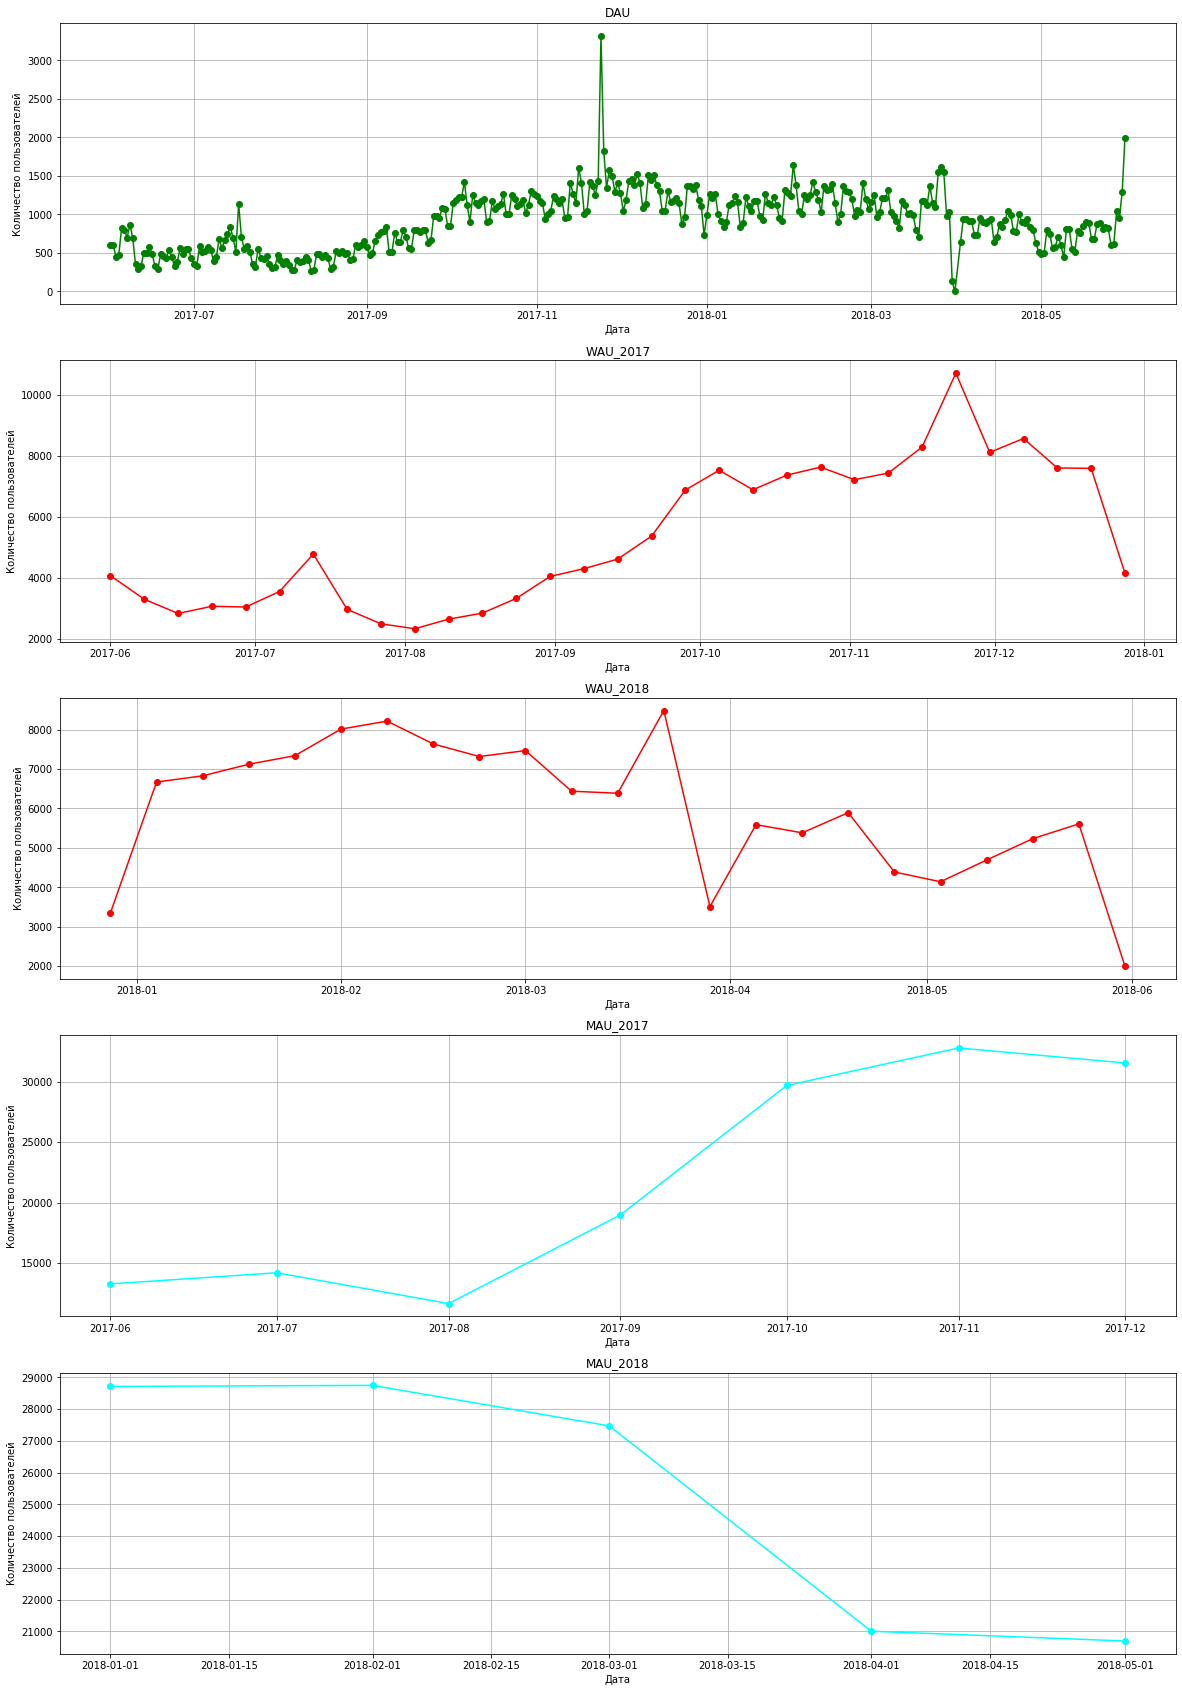

In [30]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(20, 30))
 
axes[0].plot(dau, 'o-', color = 'green')
axes[0].set(title = 'DAU', xlabel = 'Дата', ylabel = 'Количество пользователей')
axes[0].grid()
 
axes[1].plot(wau_2017, 'o-', color = 'red')
axes[1].set(title = 'WAU_2017', xlabel = 'Дата', ylabel = 'Количество пользователей')
axes[1].grid()

axes[2].plot(wau_2018, 'o-', color = 'red')
axes[2].set(title = 'WAU_2018', xlabel = 'Дата', ylabel = 'Количество пользователей')
axes[2].grid()
 
axes[3].plot(mau_2017, 'o-', color = 'cyan')
axes[3].set(title = 'MAU_2017', xlabel = 'Дата', ylabel = 'Количество пользователей')
axes[3].grid()

axes[4].plot(mau_2018, 'o-', color = 'cyan')
axes[4].set(title = 'MAU_2018', xlabel = 'Дата', ylabel = 'Количество пользователей')
axes[4].grid()

<a class="anchor" id="21-bullet">

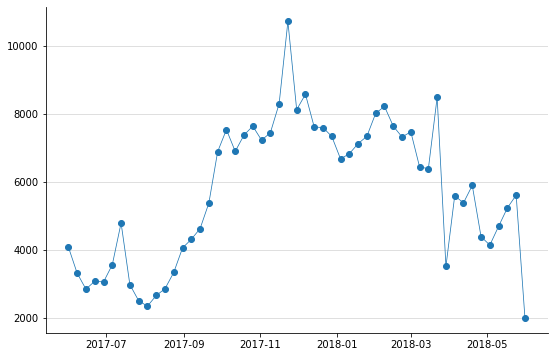

In [31]:
wau_ = visits.assign(week_ = lambda row: row['start_ts'].astype('datetime64[W]'))\
    .groupby('week_', as_index=False)\
    .agg({'uid': 'nunique'})

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(wau_['week_'], wau_['uid'], marker='o', linewidth=0.75)
sns.despine(ax=ax)
ax.grid(color='grey', axis='y', alpha=0.5, linewidth=0.5);

Мы видим что рост количества пользователей по всем метрикам начался в сентябре 2017. Интенсивный рост так же как и пиковые значения приходятся на новый год. После чего начинается плавный спад.

In [32]:
sessions_per_user = (
    visits.groupby('session_date', as_index=False)
    .agg({'uid': ['count', 'nunique']})
)
sessions_per_user.columns = ['session_date','n_sessions', 'n_users']
sessions_per_user['sess_per_user'] =\
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sess_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sess_per_user, dtype: float64

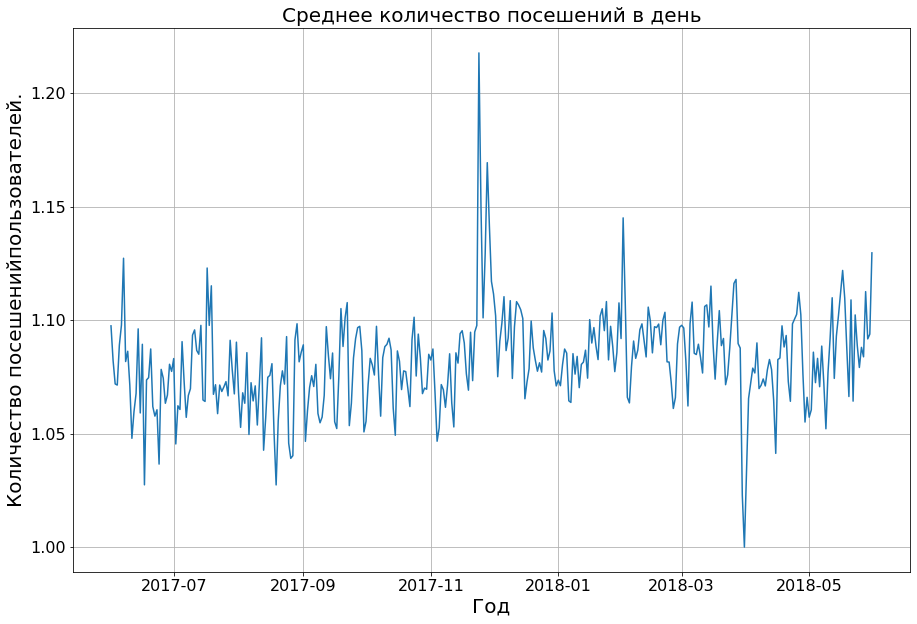

In [33]:
plt.figure(figsize = (15,10))
sns.lineplot(x=sessions_per_user['session_date'] , y=sessions_per_user['sess_per_user'])
plt.title('Среднее количество посешений в день', fontsize=20)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество посешенийпользователей.', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

В течении всего периода средний пользователь не открывал приложение более одного раза в день.

#### Duration

In [34]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.total_seconds()

In [35]:
(visits['end_ts'] - visits['start_ts']).dt.total_seconds().describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
dtype: float64

In [36]:
(visits['end_ts'] - visits['start_ts']).dt.seconds.describe()


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
dtype: float64

В данных есть некоректные даты и время, узнаем сколько их.

In [37]:
visits[visits['session_duration_sec'] < 1 ].count()

device                  35796
end_ts                  35796
source_id               35796
start_ts                35796
uid                     35796
session_date            35796
session_week            35796
session_month           35796
session_year            35796
session_duration_sec    35796
dtype: int64

Так как в данных большое количество сессий с нулей продолжительностью, их учитывать при расчете типичной продолжительности сессии не будем.

Так же мы незнаем ошибочные это записи или нет, возможно было некоректно записано время посещения из-за разных часовых поясов на устройстве и сервере.

In [38]:
visits[visits['session_duration_sec'] > 0]['session_duration_sec'].describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

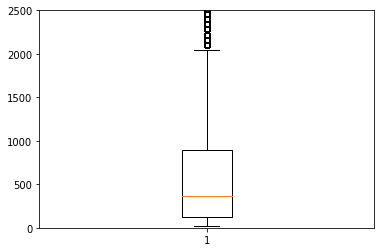

In [39]:
plt.boxplot(visits[visits['session_duration_sec'] > 0]['session_duration_sec'])
plt.ylim(0,2500)
plt.show()

Мы видим достаточно большое стандартное отклонение и большое количество выбросов

In [40]:
visits[visits['session_duration_sec'] > 0]['session_duration_sec'].mode()

0    60.0
dtype: float64

In [41]:
visits[visits['session_duration_sec'] > 0]['session_duration_sec'].median()

360.0

Чаше всего сессия длится минуту однако как минимум половине пользователей требуется не менее 360 секунд.

#### Retantion Rate

In [42]:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')

In [43]:
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [44]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [45]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [46]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

In [47]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [48]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

del retention_pivot[0]
retention_pivot.index = [str(x)[0:10] for x in retention_pivot.index]

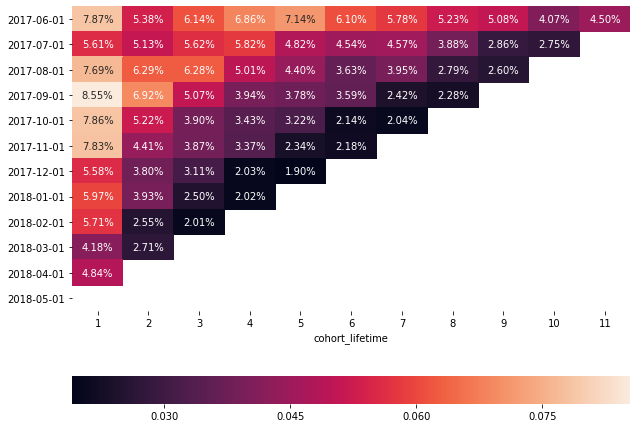

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linecolor='black', cbar_kws={'orientation': 'horizontal'})
plt.show()

Мы видим уменьшение коэффицента удержание во всех когортах с течением времени. Так же он уменьшается с каждой новой когортой. Самый высокий коэфицент удержания исходя из периода жизни у первой когорты. Самый маленький у когорты пользователей пришедших под новый год , именно на этот период приходить самый большой прирост новых посетителей. Похоже что маркететологи сработали хорошо, либо причиной этого стала сезонность. Однако удержать их не получилось, исходя из данных уменьшение коэффицента удержание становиться закономерностью. Возможно что-то не так с UI/UX.

In [50]:
print('Среднией Retention Rate на второй месяц жизни когорт {:.2%}'.format(retention_pivot[1].mean()))

Среднией Retention Rate на второй месяц жизни когорт 6.52%


### Метрики электронной коммерции

#### Время покупки

Узнаем сколько времени в среднем проходит от первого посещения до покупки.

In [51]:
events = pd.merge(orders, visits.groupby('uid').agg({'start_ts': 'min'}).reset_index(), on='uid', how='left')

In [52]:
events['time_difference'] = (events['buy_ts'] - events['start_ts']).dt.total_seconds()

In [53]:
(events['buy_ts'] - events['start_ts']).dt.total_seconds().describe().apply("{0:.2f}".format)

count       50415.00
mean      3199986.29
std       6100780.37
min             0.00
25%           360.00
50%         12360.00
75%       3316950.00
max      31480140.00
dtype: object

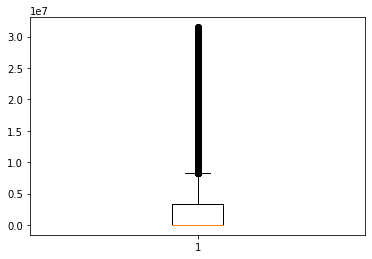

In [54]:
plt.boxplot(events['time_difference'])
plt.show()

In [55]:
events['time_difference'].mean() / 86400

37.03687832655625

In [56]:
events['time_difference'].median() / 3600

3.433333333333333

Не менее половины пользователи совершают покупку спустя 3 часа, при этом в среднем пользователю требуется не менее 37 дней для совершения покупки. 

<a class="anchor" id="22-bullet">

#### Среднее количество покупок

In [57]:
first_buy_date = orders.groupby('uid')['buy_ts'].min()
first_buy_date.name = 'first_buy_date'
orders = orders.join(first_buy_date, on='uid')

In [58]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')

In [59]:
orders['cohort_lifetime'] = orders['buy_month'] - orders['first_buy_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

In [60]:
buy_cohorts = orders.groupby(['cohort_lifetime','first_buy_month']).agg({'buy_ts': 'count','uid':'nunique'}).reset_index()

buy_cohorts['buy_per_user'] = buy_cohorts['buy_ts'] / buy_cohorts['uid']

In [61]:
buy_pivot = buy_cohorts.pivot_table(index='first_buy_month',
                          columns='cohort_lifetime',
                          values='buy_per_user',
                          aggfunc='mean')
buy_pivot = buy_pivot.round(2)
buy_pivot.index = [str(x)[0:10] for x in buy_pivot.index]

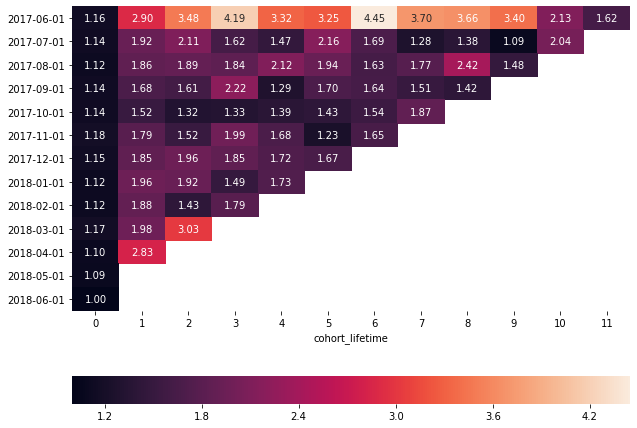

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(buy_pivot, annot=True, fmt='.2f', linecolor='black', cbar_kws={'orientation': 'horizontal'})
plt.show()

Наибольшее количество покупок на пользователя приходить на первую когорту. При этом не смотря на большой прирост пользователей в новогодний период. Роста количества покупок мы не наблюдаем. Мы видим тенденцию увеличения количество покупок в 1 месяц жизни когорт.

In [63]:
print('Среднее количество пукопок на одного пользователя за 6 месяцев: {:.2f}'.
      format(buy_pivot.loc[:'2017-12-01',:5].mean().mean()))

Среднее количество пукопок на одного пользователя за 6 месяцев: 1.83


#### Средний чек

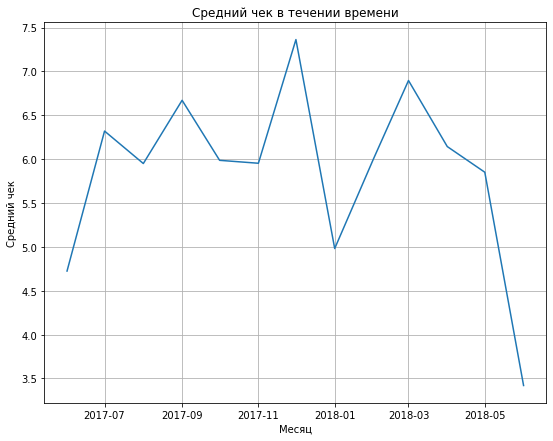

In [64]:
average_cheque = orders.groupby('buy_month').agg({'revenue': 'sum', 'uid': 'nunique'})
average_cheque['average_cheque'] = average_cheque['revenue'] / average_cheque['uid']

plt.figure(figsize=(9,7))
plt.plot(average_cheque['average_cheque'])
plt.grid(True)
plt.ylabel('Средний чек')
plt.xlabel('Месяц')
plt.title('Средний чек в течении времени')
plt.show()

In [65]:
average_cheque

,revenue,uid,average_cheque
buy_month,,,
2017-06-01,9557.49,2023,4.724414
2017-07-01,12539.47,1984,6.320297
2017-08-01,8758.78,1472,5.950258
2017-09-01,18345.51,2750,6.671095
2017-10-01,27987.70,4675,5.986674
2017-11-01,27069.93,4547,5.953360
2017-12-01,36388.60,4942,7.363132
2018-01-01,19417.13,3898,4.981306
2018-02-01,25560.54,4258,6.002945


Мы уже знаем что количество покупок в новогодний период не выросло, однако средний чек увеличился. Это говорит о том что в праздники люди покупают больше, возможно в предверии праздников было бы целесообразно вводить специальные предложения для новых пользователей для увеличения их конверсии в покупателей. Так же мы видим явный спад после марта 2018. В послепраздничный период средний чек так же ожидаемо упал.

#### LTV

In [66]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [67]:
first_orders = orders[['uid', 'first_buy_month']]

cohort_sizes = first_orders.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']

cohorts = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

In [68]:
report = pd.merge(cohorts, cohort_sizes, on='first_buy_month')

#т.к. маржинальность 100%, умножать на 1 нет смысла
report['gp'] = report['revenue']
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_buy_month',
    columns='age',
    values='ltv',
    aggfunc='sum')

output = output.cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


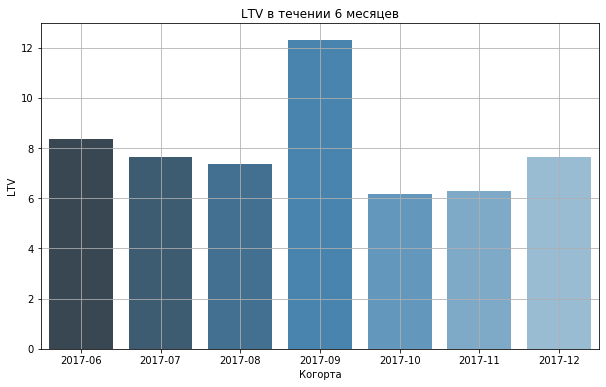

In [69]:
barplot = pd.DataFrame(output.loc[:,5]).dropna()
barplot.index = barplot.index.to_period('M')

plt.figure(figsize=(10,6))
sns.barplot(data=barplot, x =barplot.index, y=5, palette='Blues_d')
plt.ylim(0,13)
plt.grid(True)
plt.ylabel('LTV')
plt.xlabel('Когорта')
plt.title('LTV в течении 6 месяцев')
plt.show()

Средний LTV у когорт с 6 по 8 месяца 2017 года примерно одинаковый однако мы видим более высокий показатель у когорты 2017-09. После чего он снизился до 6 у.е и начал плавный рост.

###  Маркетинговые метрики

#### Расходы на маркетинг

In [70]:
source = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

In [71]:
source_costs = source.groupby('source_id')['costs'].sum()

In [72]:
print('Общие затраты на маркетинг :{}'.format(source_costs.sum()))

Общие затраты на маркетинг :329131.62


In [73]:
source_costs.sort_values(ascending=False)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

Больше всего средств было потрачено на источник с ID 3, а меньше всего на 9.

In [74]:
source['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

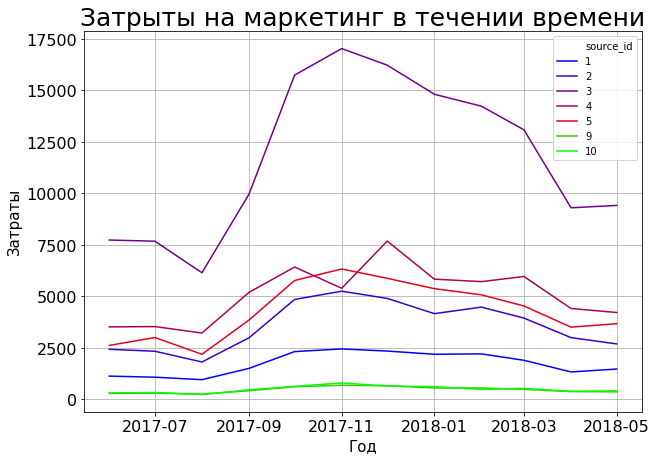

In [75]:
plt.figure(figsize=(10,7))
sns.color_palette("husl", 9)
sns.lineplot(data=source, x="month", y="costs", legend='full', hue='source_id', palette='brg')
plt.title('Затрыты на маркетинг в течении времени', fontsize=25)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Затраты', fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Графики затрат на маркетинг очень похожи на графики количества пользователей. Мы видим что расходы на все источники были увеличены в августе 2017 и имеют пиковые расходы в декабре 2017, за исключением источника № 4 в 11 месяце мы видим небольшое уменьшение расходов с последующим их увеличение 7до 7500 в декабре 2017 года. Рекламные бюджеты всех источников с августа 2017 были увеличены в 2 раза, но так и не вернулись к прежним значениям.

#### CAC

In [76]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()

In [77]:
report_new = pd.merge(report, monthly_costs, left_on='first_buy_month', right_on='month')

report_new['cac'] = report_new['costs'] / report_new['n_buyers']

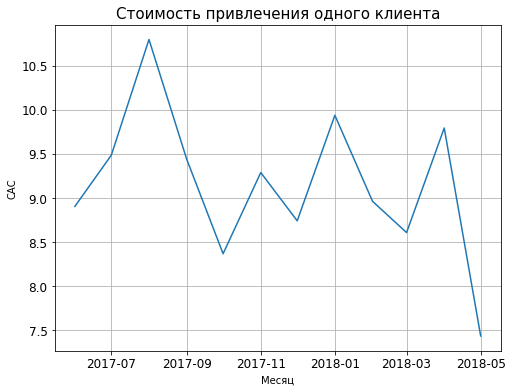

In [78]:
cac = report_new.groupby('first_buy_month').agg({'cac': 'mean'}).reset_index()

plt.figure(figsize=(8,6))
sns.color_palette("husl", 9)
sns.lineplot(data=cac, x='first_buy_month', y='cac')
plt.title('Стоимость привлечения одного клиента', fontsize=15)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('САС', fontsize=10)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Средняя стоимость превличения клиента резко возросла вместе с увеличением рекламного бюджета. После чего в октябре 2017 резко упала хотя бюджет только начинал увеличиваться. Следовательно рекламные компании были лучши продуманы. С октября 2017 до апреля 2018 САС колеблется от 8.5 до 10, при этом в марте показатель сильно упал. 

In [79]:
user_source = visits.groupby(['uid']).agg({'start_ts': 'min'}).reset_index()

In [80]:
user_source = pd.merge(user_source, visits[['source_id','uid','start_ts','first_activity_month']], on=['uid','start_ts'])
orders = pd.merge(orders, user_source[['uid', 'source_id']], on='uid')

In [81]:
source_cohorts = orders.groupby(['first_buy_month','source_id']).agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
source_cohorts = source_cohorts.rename(columns={'uid': 'source_users', 'first_buy_month': 'month'})

source_cohorts = source_cohorts.merge(source, on=['source_id','month'])

source_cohorts['cac'] = source_cohorts['costs'] / source_cohorts['source_users']

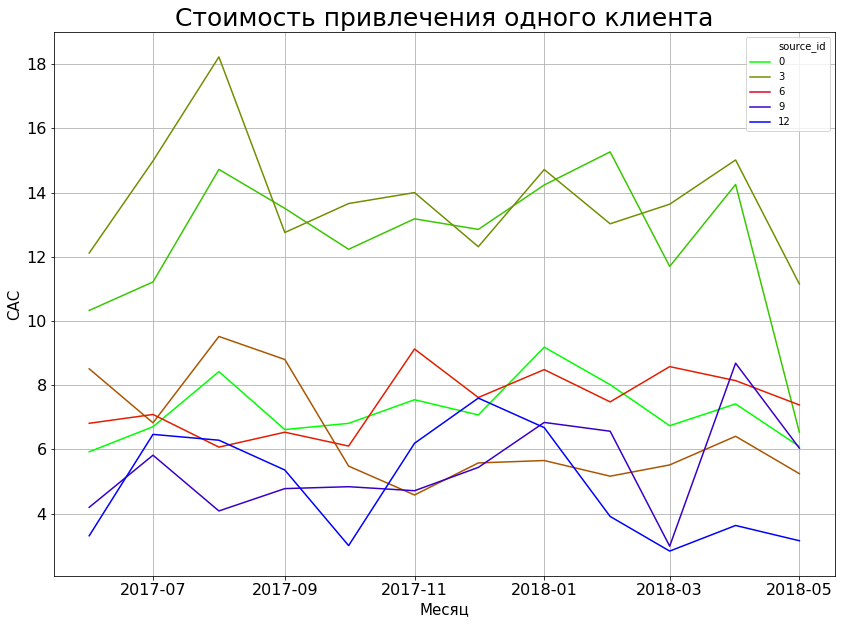

In [82]:
plt.figure(figsize=(14,10))
sns.color_palette("husl", 9)
sns.lineplot(data=source_cohorts, x='month', y='cac', hue='source_id', palette='brg_r')
plt.title('Стоимость привлечения одного клиента', fontsize=25)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('САС', fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Самых дорогих клиентов приводят источники 2 и 3.

#### ROMI

In [83]:
source = source.rename(columns={'month': 'first_buy_month'})

Напишим функцию для расчета ROMI исходя из источника.

In [84]:
def romi_source(source_name):
    df = orders.query('source_id == @source_name')
    romi = df.groupby(
        ['first_buy_month','cohort_lifetime']).agg(
        {'uid': 'nunique', 'revenue': 'sum'}).reset_index()
    romi = pd.merge(romi, source.query('source_id == @source_name'), on='first_buy_month')
    
    romi['ltv'] = romi['revenue'] / romi['uid']
    romi['cac'] = romi['costs'] / romi['uid']
    romi['romi'] = romi['ltv'] / romi['cac']
    
    pivot = romi.pivot_table(
                            index='first_buy_month',
                            columns='cohort_lifetime',
                            values='romi',
                            aggfunc='mean')
    pivot = pivot.cumsum(axis=1).round(2) 
    
    pivot.index = [str(x)[0:10] for x in pivot.index]
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot,
                annot=True,
                fmt='.2f',
                linecolor='black',
                cbar_kws={'orientation': 'horizontal'},
                cmap='gist_gray_r')
    sns.heatmap(pivot,
                annot=True,
                fmt='.2f',
                linecolor='black',
                cbar_kws={'orientation': 'horizontal'},
                mask=pivot<1,
                cmap='cool')
    plt.title('ROMI source_id :{}'.format(source_name), fontsize=15)
    plt.show()
    return  
    

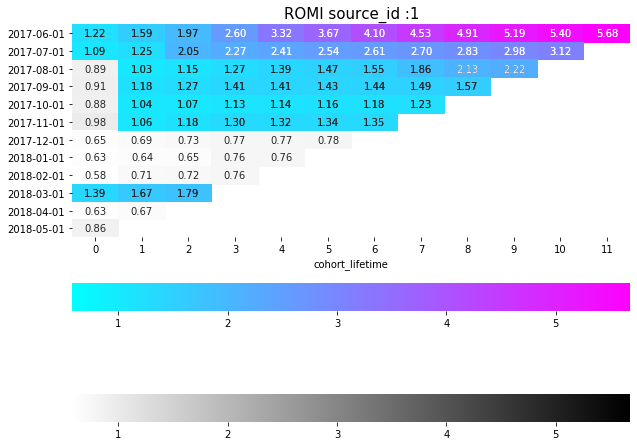

In [85]:
romi_source(1)

Пользователи пришедшие из 1 источника в большинстве своем окупились . Однако с увеличение рекламного бюджета ROMI начал снижаться. Когорты пришедшие при больших рекламных бюджетах после новогодних празников так и не окупились за исключение когорты 2018-03.

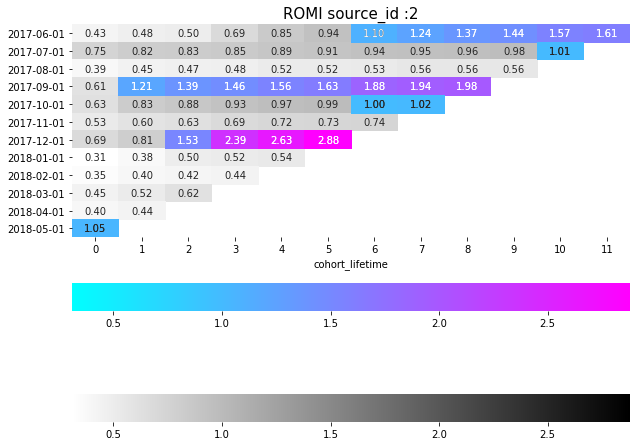

In [86]:
romi_source(2)

Окупаемость второго ресурса требует горазда больше времени нежели 1. Самыми удачными месяцами являются 9 и 12 2017 года. При этом у 2 источника один из наибольших САС.

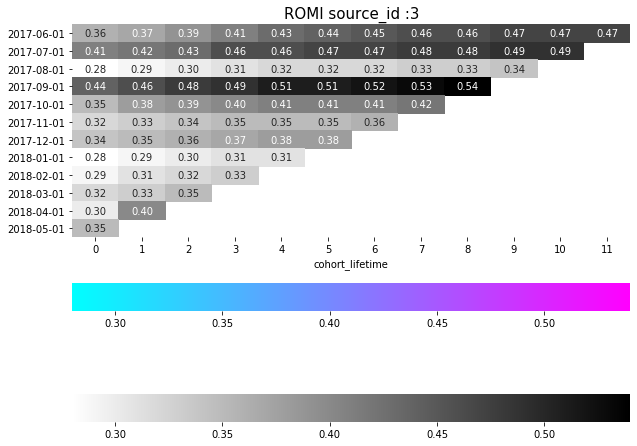

In [87]:
romi_source(3)

На третий источник было потрачено больше всего средств, но ни одна когорта так и не окупилась.

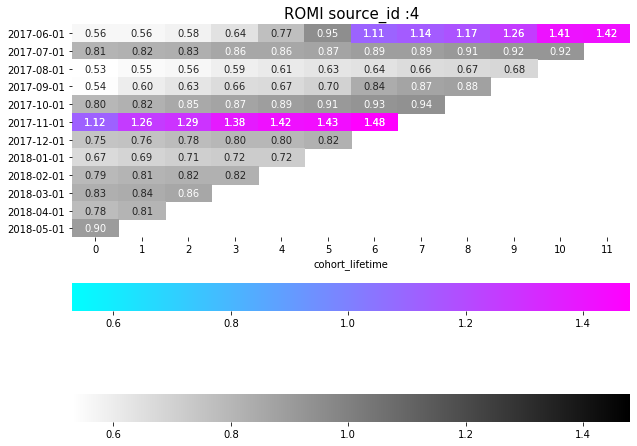

In [88]:
romi_source(4)

4 источник показал хорошие результаты только в предверии нового года. Первая когорта так же окупилась на на более длинной дистанции.

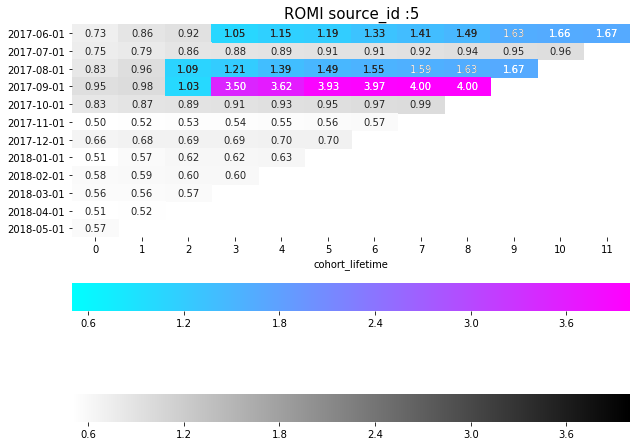

In [89]:
romi_source(5)

Пользователи пришедшие из 5 источника окрились только в трех кагортах 6,8,9 месяца 2017 года.

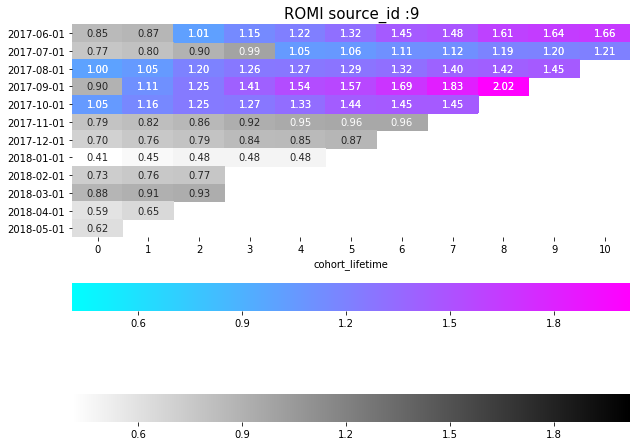

In [90]:
romi_source(9)

9 источник хорошо окупался до определенного бюджета который достиг своего пика в декабре, после чего ROMI сильно упал.

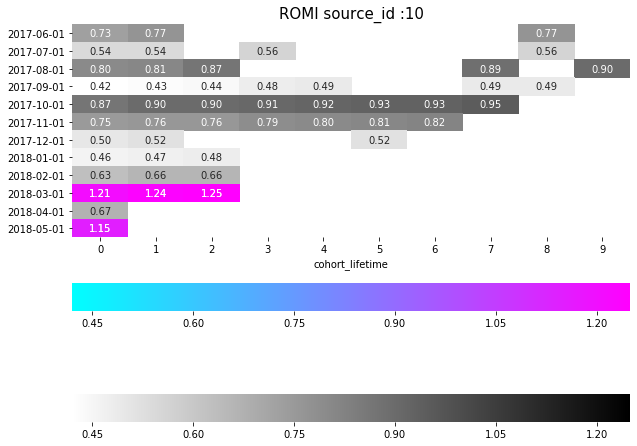

In [91]:
romi_source(10)

Как мы видим пользователи 10 источника редко возвращаются однако в последние месяцы он достаочно эффективен при среднем бюджете.

## Вывод:

Мы видим уменьшение коэффицента удержание во всех когортах с течением времени. Так же он уменьшается с каждой новой когортой. Самый высокий коэфицент удержания у первой когорты. Самый маленький у когорты пользователей пришедших под новый год , именно на этот период приходить самый большой прирост новых посетителей. Однако удержать их не получилось, исходя из данных ratantion rate удержания становиться закономерностью. Возможно что-то не так с UI/UX. Либо вопрос в сезонности.

В среднем пользователи совершают покупки не с первого посещения а только спусть 14 дней, при этом половине пользователей требуется около часа для совершения покупки.
В течении всего периода средний пользователь не открывал приложение более одного раза в день.
Сесиия половины пользователей длится не менее 360 секунд.

Наибольшее количество покупок на пользователя приходить на первую когорту. При этом не смотря на большой прирост пользователей в новогодний период. Роста количества покупок мы не наблюдаем, однако средний чек увеличился.Это говорит о том что в праздники люди покупают больше, возможно в предверии праздников было бы целесообразно вводить специальные предложения для новых пользователей для увеличения их конверсии в покупателей. Так же мы видим явный спад после марта 2018. В послепраздничный период средний чек так же ожидаемо упал.

Средний LTV у когорт с 6 по 8 месяца 2017 года примерно одинаковый около 8 у.е однако мы видим более высокий показатель у когорты 2017-09. После чего он снизился до 6 у.е и началось восстановление вплоть до 8.

Графики затрат на маркетинг очень похожи на графики количества пользователей. Мы видим что расходы на все источники были увеличены в августе 2017 и имеют пиковые расходы в декабре 2017 года. Рекламные бюджеты всех источников с августа 2017 были увеличены в 2 раза, но так и не вернулись к прежним значениям.
Средняя стоимость превличения клиента резко возросла вместе с увеличением рекламного бюджета. После чего в октябре 2017 резко упала хотя бюджет только начинал увеличиваться. Следовательно рекламные компании были лучши продуманы. С октября 2017 до апреля 2018 средний САС колеблется от 8.5 до 10, при этом в марте показатель сильно упал.


Следует обратить внимание на источники № 1, 5, 9 но необходимо оптимизировать бюджет. Источники 4 и 2 показывают высокий ROMI в празничный период. От источника 3 следует отказаться, так как ни одна кагорта так и не окупилась. Пользователи 10 источника редко возвращаються однако следует проанализировать его дальнейшие метрики так как в последние месяцы он показывал неплохой ROMI. При этом самой перспективной кагортой является 2019-09 так как она имеет самый высокий средний LTV за 6 месяцев.
